<a href="https://colab.research.google.com/github/nadj4/masinsko-ucenje-radovi/blob/main/linearni_model_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

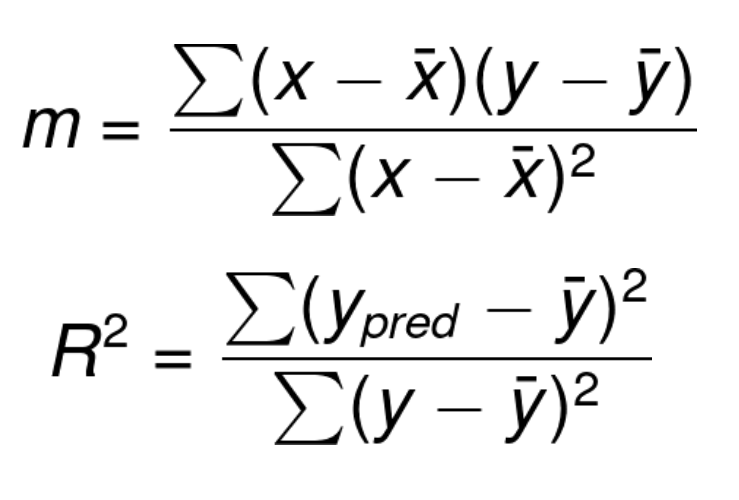

m =  -0.007262051618149458
c =  45.851427057774984


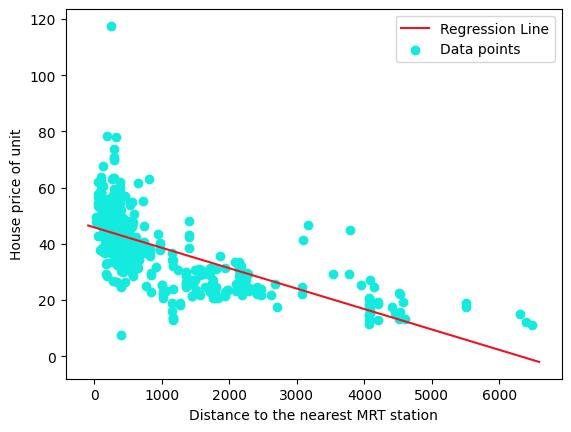

r^2 =  0.45375427891826703


In [22]:
#odredjujemo zavisnost cene od udaljenosti od mrt stanice

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data = pd.read_csv("Real estate.csv")
data.head

X = data['X3 distance to the nearest MRT station'].values
Y = data['Y house price of unit area'].values

# prosek je u formualama obelezen kao x ili y nadvuceno - mean funkcija(average)
avg_x = np.mean(X)
avg_y = np.mean(Y)

# y = mx + c
# prva formula - odredjivanje koeficijenata
l=len(X)
s1 = 0
s2 = 0

for i in range(l):
  s1 += (X[i] - avg_x) * (Y[i] - avg_y)
  s2 += (X[i] - avg_x) ** 2

m = s1 / s2
c = avg_y - (m * avg_x)

print("m = ", m)
print("c = ", c)

# skiciranje grafika
max_x = np.max(X) + 100
min_x = np.min(Y) - 100
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='#ea1520', label='Regression Line')
plt.scatter(X, Y, c='#15eadf', label='Data points')

plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('House price of unit')
plt.legend()
plt.show()

# R na kvadrat (blizina podatka u odnosu na regresionu liniju - sto je ovaj broj veci - veca je tacnost naseg modela) - druga formula

ss_t = 0
ss_r = 0 # sume

for i in range(len(data.values)):
  y_pred = c + m * X[i] # predvidjena vrednost y
  ss_t += (Y[i] - avg_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print("r^2 = ", r2)
